In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

from scipy import ndimage

import contextily as cx

import matplotlib.pylab as pylab
import matplotlib

from shapely.geometry import Point
from shapely.geometry import LineString

from utils.gpdutils import generate_gpd, generate_lines
from utils.timeutils import time_transfer

In [17]:
gps = pd.read_csv('./data/gps/gps_0906.csv')
gps = time_transfer(gps)
gps = generate_gpd(gps, True)

In [24]:
routine = gps.set_index(['nidx','direction']).loc[0].loc[0]

In [9]:
mapdf = pd.read_excel('./data/map/map_up.xlsx')
mapdf = generate_gpd(mapdf, True)
mapdf


,lon,lat,name,type,geometry
0,121.250598,31.407542,菊园车站,1,POINT (13497554.828 3685790.104)
1,121.250229,31.404693,交叉口0,2,POINT (13497513.706 3685418.502)
2,121.250175,31.402306,嘉行公路平城路,1,POINT (13497507.740 3685107.193)
3,121.250215,31.401322,交叉口1,2,POINT (13497512.215 3684978.819)
4,121.250078,31.398517,交叉口2,2,POINT (13497496.897 3684613.019)
...,...,...,...,...,...
80,121.249174,31.329699,交叉口53,2,POINT (13497396.309 3675641.265)
81,121.250021,31.329916,双单路胜辛路,1,POINT (13497490.596 3675669.545)
82,121.250783,31.330297,交叉口54,2,POINT (13497575.466 3675719.224)
83,121.251050,31.330372,交叉口55,2,POINT (13497605.166 3675728.920)


In [10]:
mapline = generate_lines(mapdf)


NameError: name 'routine' is not defined

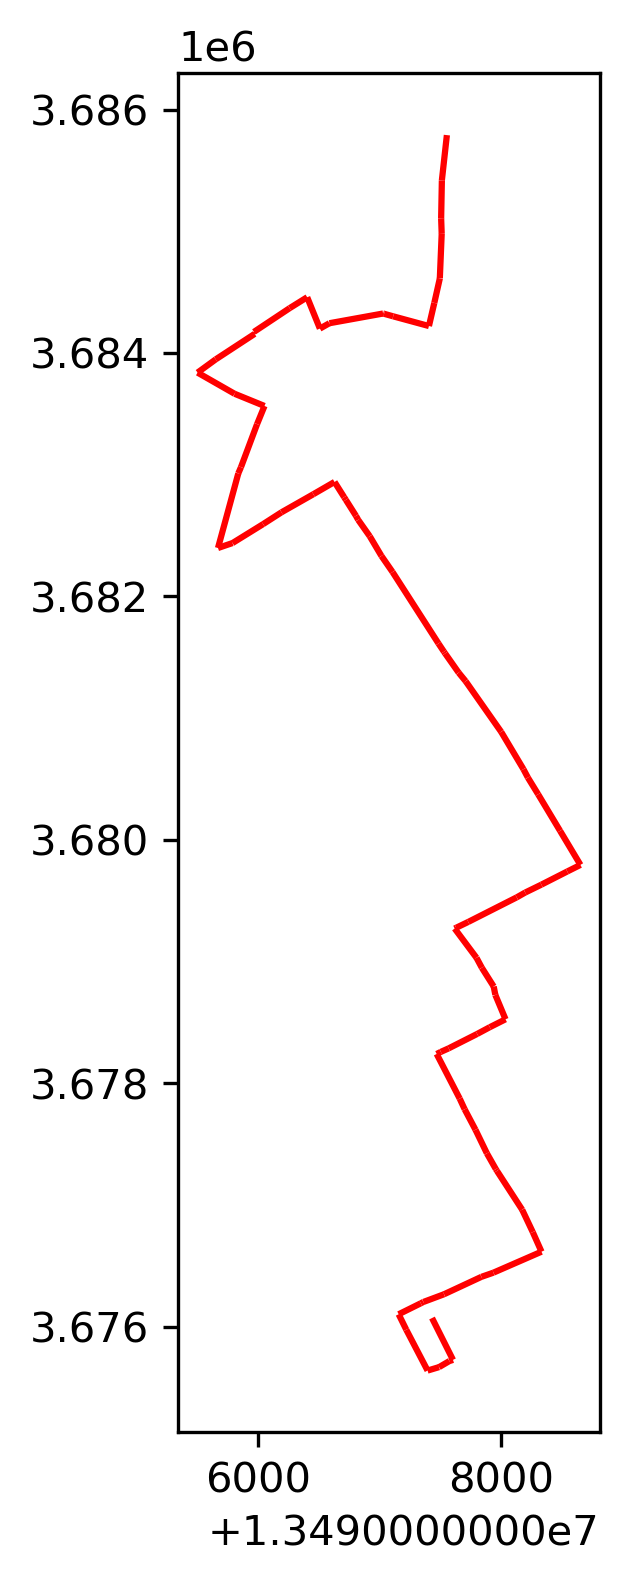

In [11]:
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
mapline.plot(ax = ax, color = 'r')
routine.plot(ax = ax, color = 'b')


In [12]:
mapline

,name,geometry
0,菊园车站-交叉口0,"LINESTRING (13497554.828 3685790.104, 13497513..."
1,交叉口0-嘉行公路平城路,"LINESTRING (13497513.706 3685418.502, 13497507..."
2,嘉行公路平城路-交叉口1,"LINESTRING (13497507.740 3685107.193, 13497512..."
3,交叉口1-交叉口2,"LINESTRING (13497512.215 3684978.819, 13497496..."
4,交叉口2-菊园新村,"LINESTRING (13497496.897 3684613.019, 13497451..."
...,...,...
79,云屏路双丁路-交叉口53,"LINESTRING (13497221.315 3675976.718, 13497396..."
80,交叉口53-双单路胜辛路,"LINESTRING (13497396.309 3675641.265, 13497490..."
81,双单路胜辛路-交叉口54,"LINESTRING (13497490.596 3675669.545, 13497575..."
82,交叉口54-交叉口55,"LINESTRING (13497575.466 3675719.224, 13497605..."


In [13]:
buffer = mapline.buffer(50, cap_style=2)

<AxesSubplot:>

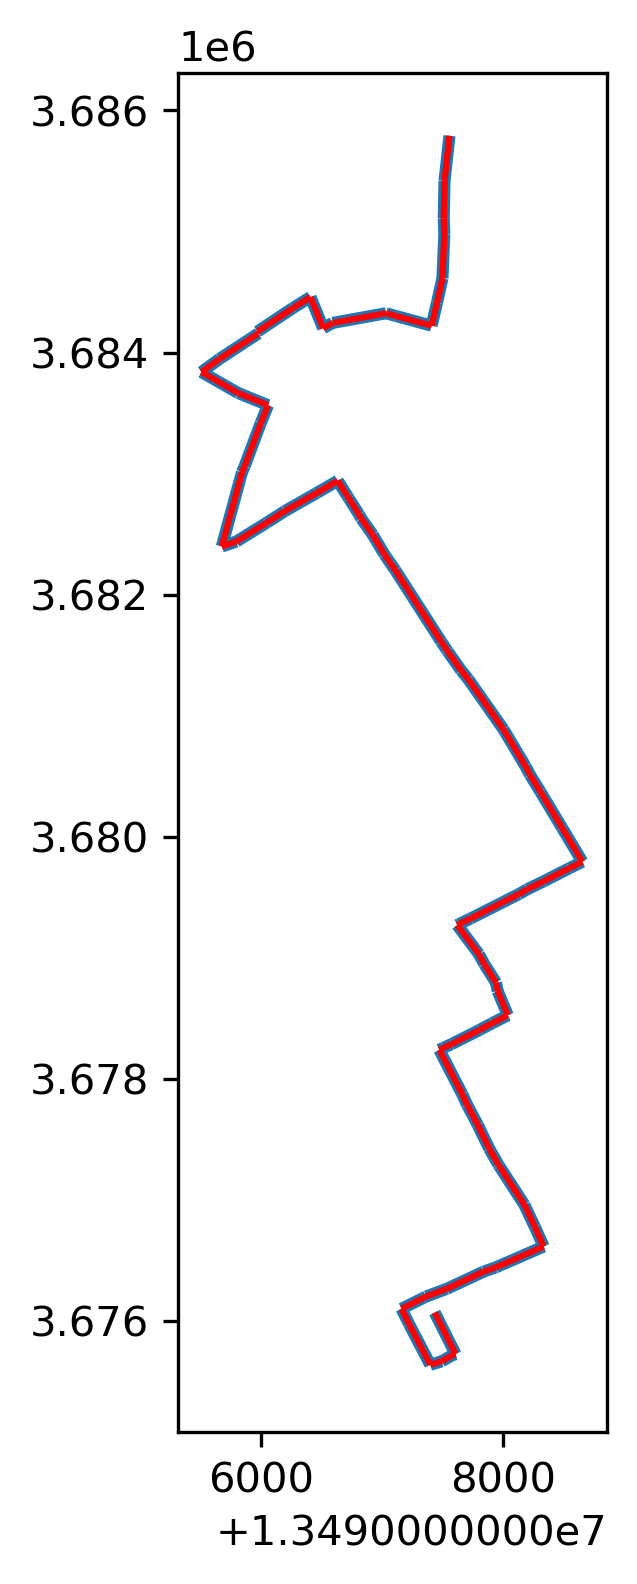

In [16]:
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
mapline.plot(ax = ax, color = 'r')
buffer.plot(ax = ax)

In [56]:
# testline = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
testlines = gpd.GeoSeries([LineString([(0, 0), (1, 1)]),
                            LineString([(1, 1), (0, 2)]),
                            LineString([(0, 2), (2, 2)]),
                            LineString([(2, 2), (3, 1)]),
                            LineString([(3, 1), (1, 0)])])
testbuffer = testlines.buffer(0.2, cap_style=2, join_style=2)

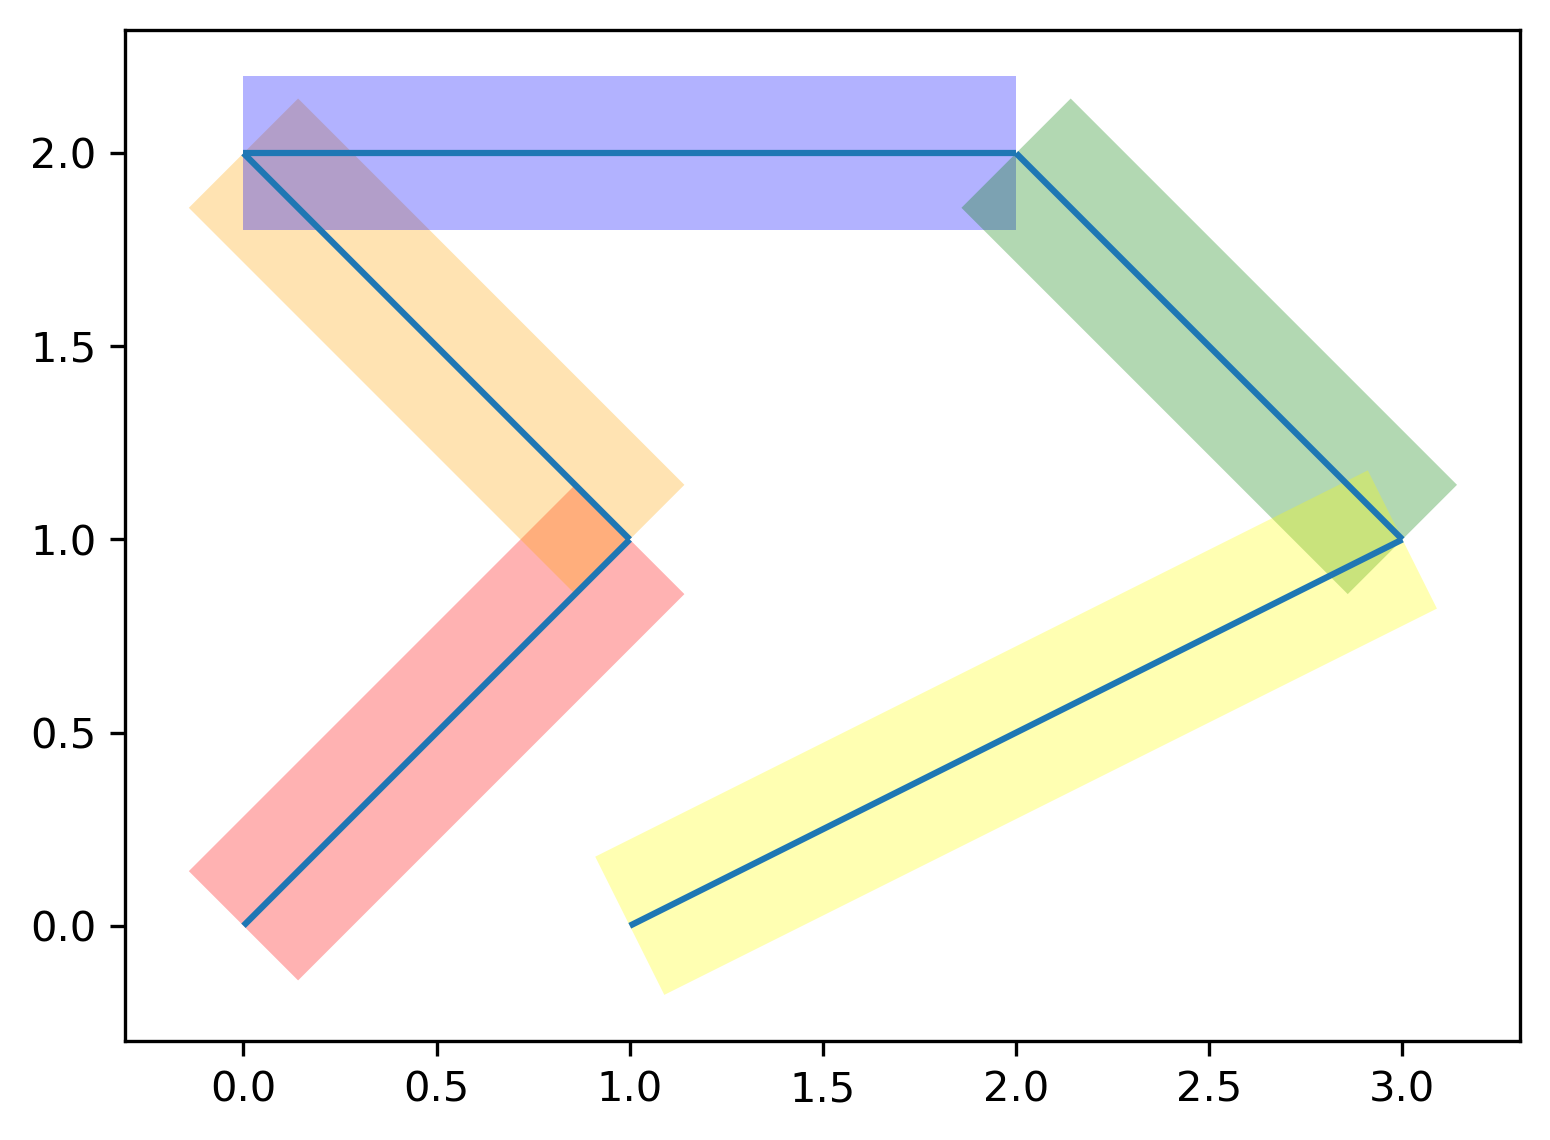

In [57]:
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
gpd.GeoSeries(testlines).plot(ax = ax)
color = ['red','orange','blue','green','yellow']
for i in range(len(testbuffer)):
    gpd.GeoSeries(testbuffer[i]).plot(ax = ax, color = color[i], alpha=0.3)